# Lecture 3: CKY algorithm

In [41]:
from cky_trace import *
from g0cnf import *
import nltk

## Chomsky normal form
Terminal productions are unary

In [9]:
l0cnf[1:8]

[('D', 'a'),
 ('D', 'some'),
 ('D', 'every'),
 ('D', 'one'),
 ('D', 'two'),
 ('A', 'gentle'),
 ('A', 'clear')]

Other productions are binary

In [11]:
p0cnf[1:8]

[('S', 'DP', 'V'),
 ('DP', 'D', 'N'),
 ('DP', 'D', 'NP'),
 ('NP', 'N', 'PP'),
 ('NP', 'NP', 'PP'),
 ('NP', 'A', 'NP'),
 ('VP', 'V', 'DP')]

In [17]:
sent1 = ['Sue','praises','Maria','and','the','student']
recognize1 = accepts((l0cnf,p0cnf),sent1)

--------------------------------------- initialize diagonal
[[], ['DP'], [], [], [], [], []]
[[], [], ['V'], [], [], [], []]
[[], [], [], ['DP'], [], [], []]
[[], [], [], [], ['Coord'], [], []]
[[], [], [], [], [], ['D'], []]
[[], [], [], [], [], [], ['N']]
[[], [], [], [], [], [], []]
--------------------------------------- adding (S 0 2)
[[], ['DP'], ['S'], [], [], [], []]
[[], [], ['V'], [], [], [], []]
[[], [], [], ['DP'], [], [], []]
[[], [], [], [], ['Coord'], [], []]
[[], [], [], [], [], ['D'], []]
[[], [], [], [], [], [], ['N']]
[[], [], [], [], [], [], []]
--------------------------------------- adding (VP 1 3)
[[], ['DP'], ['S'], [], [], [], []]
[[], [], ['V'], ['VP'], [], [], []]
[[], [], [], ['DP'], [], [], []]
[[], [], [], [], ['Coord'], [], []]
[[], [], [], [], [], ['D'], []]
[[], [], [], [], [], [], ['N']]
[[], [], [], [], [], [], []]
--------------------------------------- adding (CoordD 3 5)
[[], ['DP'], ['S'], [], [], [], []]
[[], [], ['V'], ['VP'], [], [], []]
[[], [

In [134]:
[w for w in enumerate(sent1)]

[(0, 'Sue'),
 (1, 'praises'),
 (2, 'Maria'),
 (3, 'and'),
 (4, 'the'),
 (5, 'student')]

In [19]:
recognize1

True

In [20]:
sent2 = ['Sue','praises','Maria','and','student','the']
recognize2 = accepts((l0cnf,p0cnf),sent2)

--------------------------------------- initialize diagonal
[[], ['DP'], [], [], [], [], []]
[[], [], ['V'], [], [], [], []]
[[], [], [], ['DP'], [], [], []]
[[], [], [], [], ['Coord'], [], []]
[[], [], [], [], [], ['N'], []]
[[], [], [], [], [], [], ['D']]
[[], [], [], [], [], [], []]
--------------------------------------- adding (S 0 2)
[[], ['DP'], ['S'], [], [], [], []]
[[], [], ['V'], [], [], [], []]
[[], [], [], ['DP'], [], [], []]
[[], [], [], [], ['Coord'], [], []]
[[], [], [], [], [], ['N'], []]
[[], [], [], [], [], [], ['D']]
[[], [], [], [], [], [], []]
--------------------------------------- adding (VP 1 3)
[[], ['DP'], ['S'], [], [], [], []]
[[], [], ['V'], ['VP'], [], [], []]
[[], [], [], ['DP'], [], [], []]
[[], [], [], [], ['Coord'], [], []]
[[], [], [], [], [], ['N'], []]
[[], [], [], [], [], [], ['D']]
[[], [], [], [], [], [], []]
--------------------------------------- adding (CoordN 3 5)
[[], ['DP'], ['S'], [], [], [], []]
[[], [], ['V'], ['VP'], [], [], []]
[[], [

In [21]:
recognize2

False

### Initialize the matrix


In [25]:
def initializeMatrix_(w,PL,matrix):  
    for (i,wi) in enumerate(w): 
        for (lhs,rhs) in PL:
            if rhs == wi:
                matrix[i][i+1].append(lhs)

### Fill the matrix

In [26]:
def closeMatrix_(P,matrix,length):
    positions = length+1
    for width in range(2,positions):
        for start in range(positions-width):
            end = start + width
            for mid in range(start+1,end):
                for (lhs,y,z) in P:
                    if y in matrix[start][mid] and z in matrix[mid][end]:
                        matrix[start][end].append(lhs)

### Recognition function

In [28]:
def accepts_(g,w):
    (PL,P) = g
    length = len(w)
    positions = length + 1 
    matrix = [ [ [] for i in range(positions) ] for j in range(positions) ]
    initializeMatrix(w,PL,matrix)
    closeMatrix(P,matrix,length)
    showMatrix(matrix)
    return 'S' in matrix[0][length]

In [31]:
m = [ [ [] for i in range(5) ] for j in range(5) ]
m

[[[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []]]

In [135]:
[ [] for i in range(5) ]

[[], [], [], [], []]

In [32]:
m[0][1].append('DP')
m

[[[], ['DP'], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []]]

In [34]:
m[0][4].append('S')
m

[[[], ['DP'], [], [], ['S']],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []]]

### CKY algorithm in pseudocode

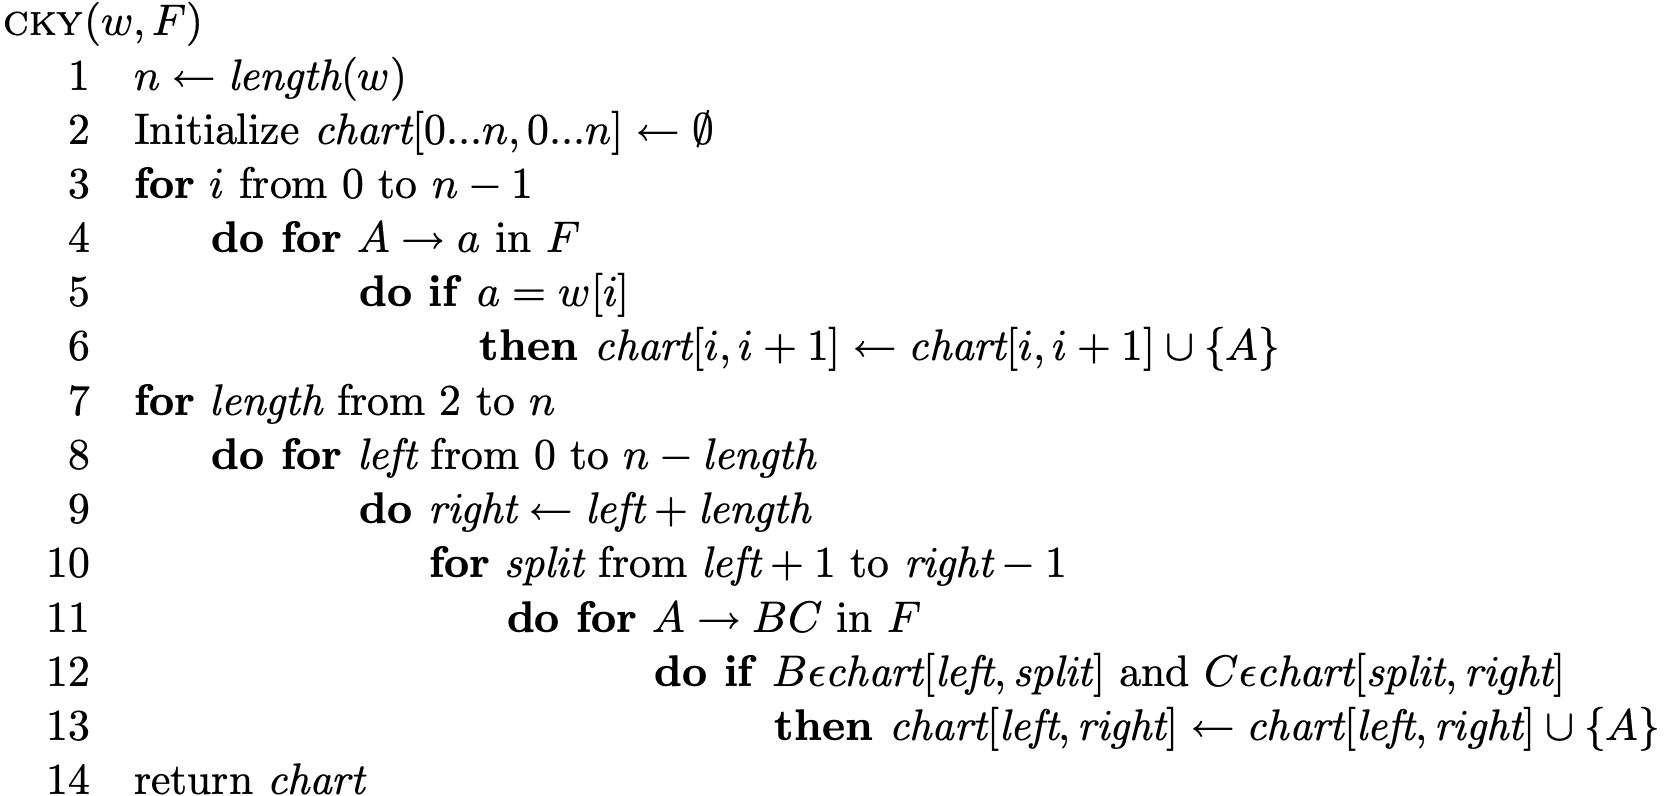

In [36]:
from IPython.display import Image
Image(filename='cky.png') 

## Useless symbols
Working bottom up, often symbols are introduced that do
not contribute to a complete tree.  This is seen in the examples earlier.

Strategy: copy the chart top-down to a new chart, including those symbols and productions that have contributed to a complete tree.

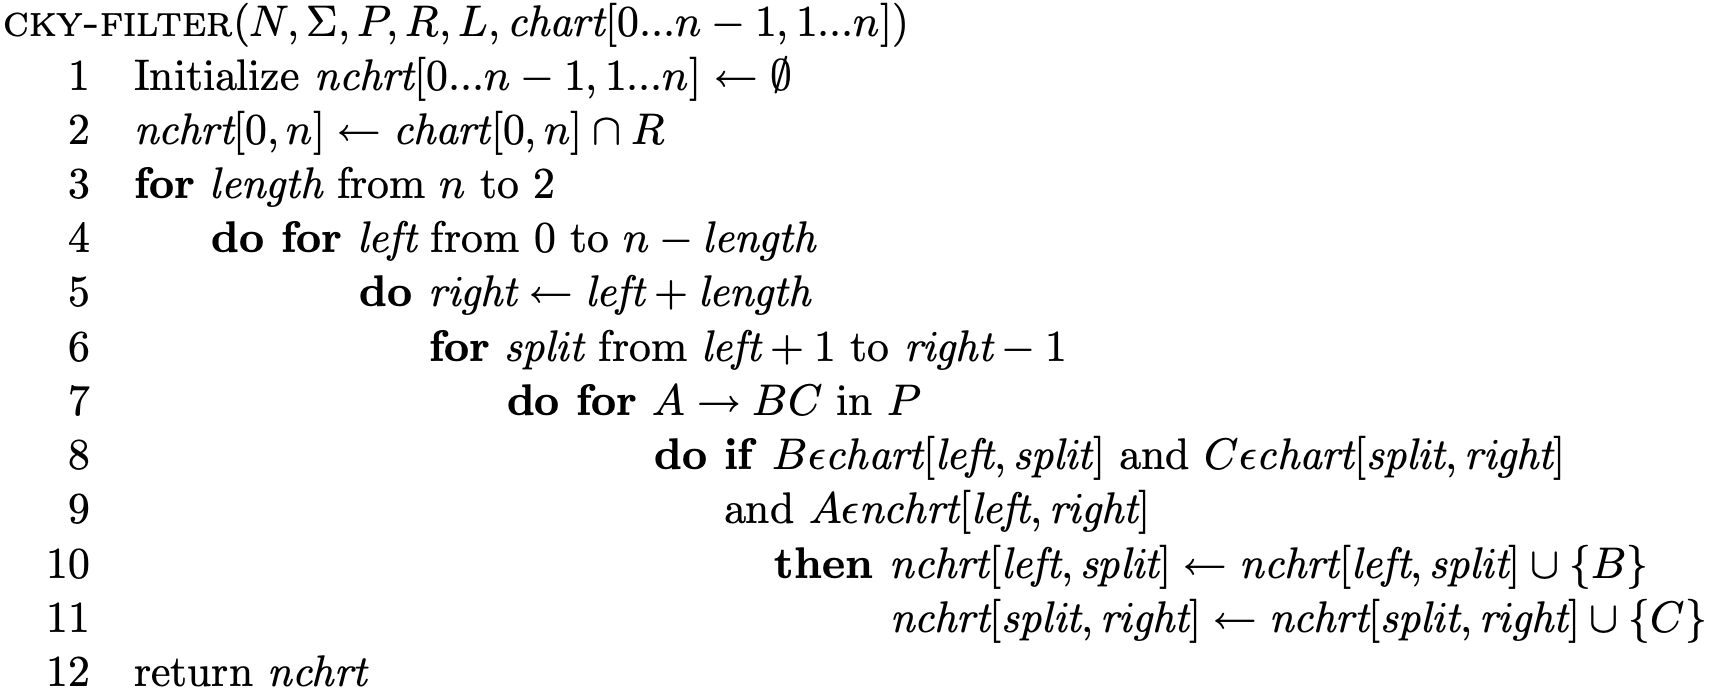

In [39]:
Image(filename='cky-filter04.png') 

## Shared forest
The chart does not represent a set of trees in a direct way.  The relation between a parent vertex and its children is in fact not represented at all, and one needs the grammar to reconstruct it.

Given a tree, one can mechanically substitute *range symbols* for the original symbols.

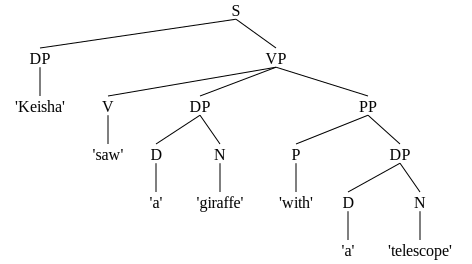

In [103]:
t1 = nltk.Tree.fromstring(
    "(S (DP 'Keisha') (VP (V 'saw') (DP (D 'a') (N 'giraffe'))(PP (P 'with') (DP (D 'a') (N 'telescope')))))")
t1

In [104]:
t1a = t1.copy()
t1a._label = (0,7,'S')
t1a[0]._label = (0,1,'DP')
t1a[1]._label = (1,7,'VP')
print(t1a)

((0, 7, 'S')
  ((0, 1, 'DP') 'Keisha')
  ((1, 7, 'VP')
    (V 'saw')
    (DP (D 'a') (N 'giraffe'))
    (PP (P 'with') (DP (D 'a') (N 'telescope')))))


In [116]:
t1a[1][2]._label = (4,7,'PP')
t1a[1][2][0]._label = (4,5,'P')
t1a[1][2][1]._label = (5,7,'DP')
t1a[1][2][1][0]._label = (5,6,'D')
t1a[1][2][1][1]._label = (6,7,'N')
print(t1a)

((0, 7, 'S')
  ((0, 1, 'DP') 'Keisha')
  ((1, 7, 'VP')
    (V 'saw')
    (DP (D 'a') (N 'giraffe'))
    ((4, 7, 'PP')
      ((4, 5, 'P') 'with')
      ((5, 7, 'DP') ((5, 6, 'D') 'a') ((6, 7, 'N') 'telescope')))))


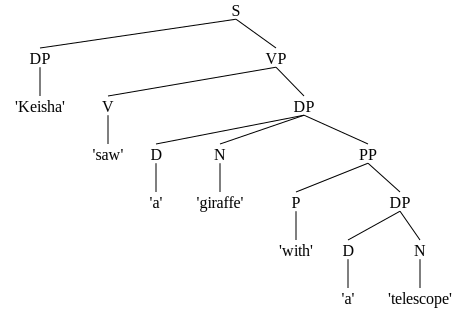

In [125]:
t2 = nltk.Tree.fromstring(
    "(S (DP 'Keisha') (VP (V 'saw') (DP (D 'a') (N 'giraffe')(PP (P 'with') (DP (D 'a') (N 'telescope'))))))")
t2

In [126]:
t2a = t2.copy()
## Relabel PP with range symbol
print(t2a[1][1][2]._label)
t2a[1][1][2]._label = (4,7,'PP')
t2a[1][1][2][0]._label = (4,5,'P')
t2a[1][1][2][1]._label = (5,7,'DP')
t2a[1][1][2][1][0]._label = (5,6,'D')
t2a[1][1][2][1][1]._label = (6,7,'N')
print(t2a)

PP
(S
  (DP 'Keisha')
  (VP
    (V 'saw')
    (DP
      (D 'a')
      (N 'giraffe')
      ((4, 7, 'PP')
        ((4, 5, 'P') 'with')
        ((5, 7, 'DP') ((5, 6, 'D') 'a') ((6, 7, 'N') 'telescope'))))))


In t1 the PP looks the same
```
((4, 7, 'PP')
      ((4, 5, 'P') 'with')
      ((5, 7, 'DP') ((5, 6, 'D') 'a') ((6, 7, 'N') 'telescope')))))
```
Range trees ``express'' the fact that t1 and t2 share some structure.

Strategy: create a CFG for the range trees.

*The assignment on line 4 looks erroneous.*

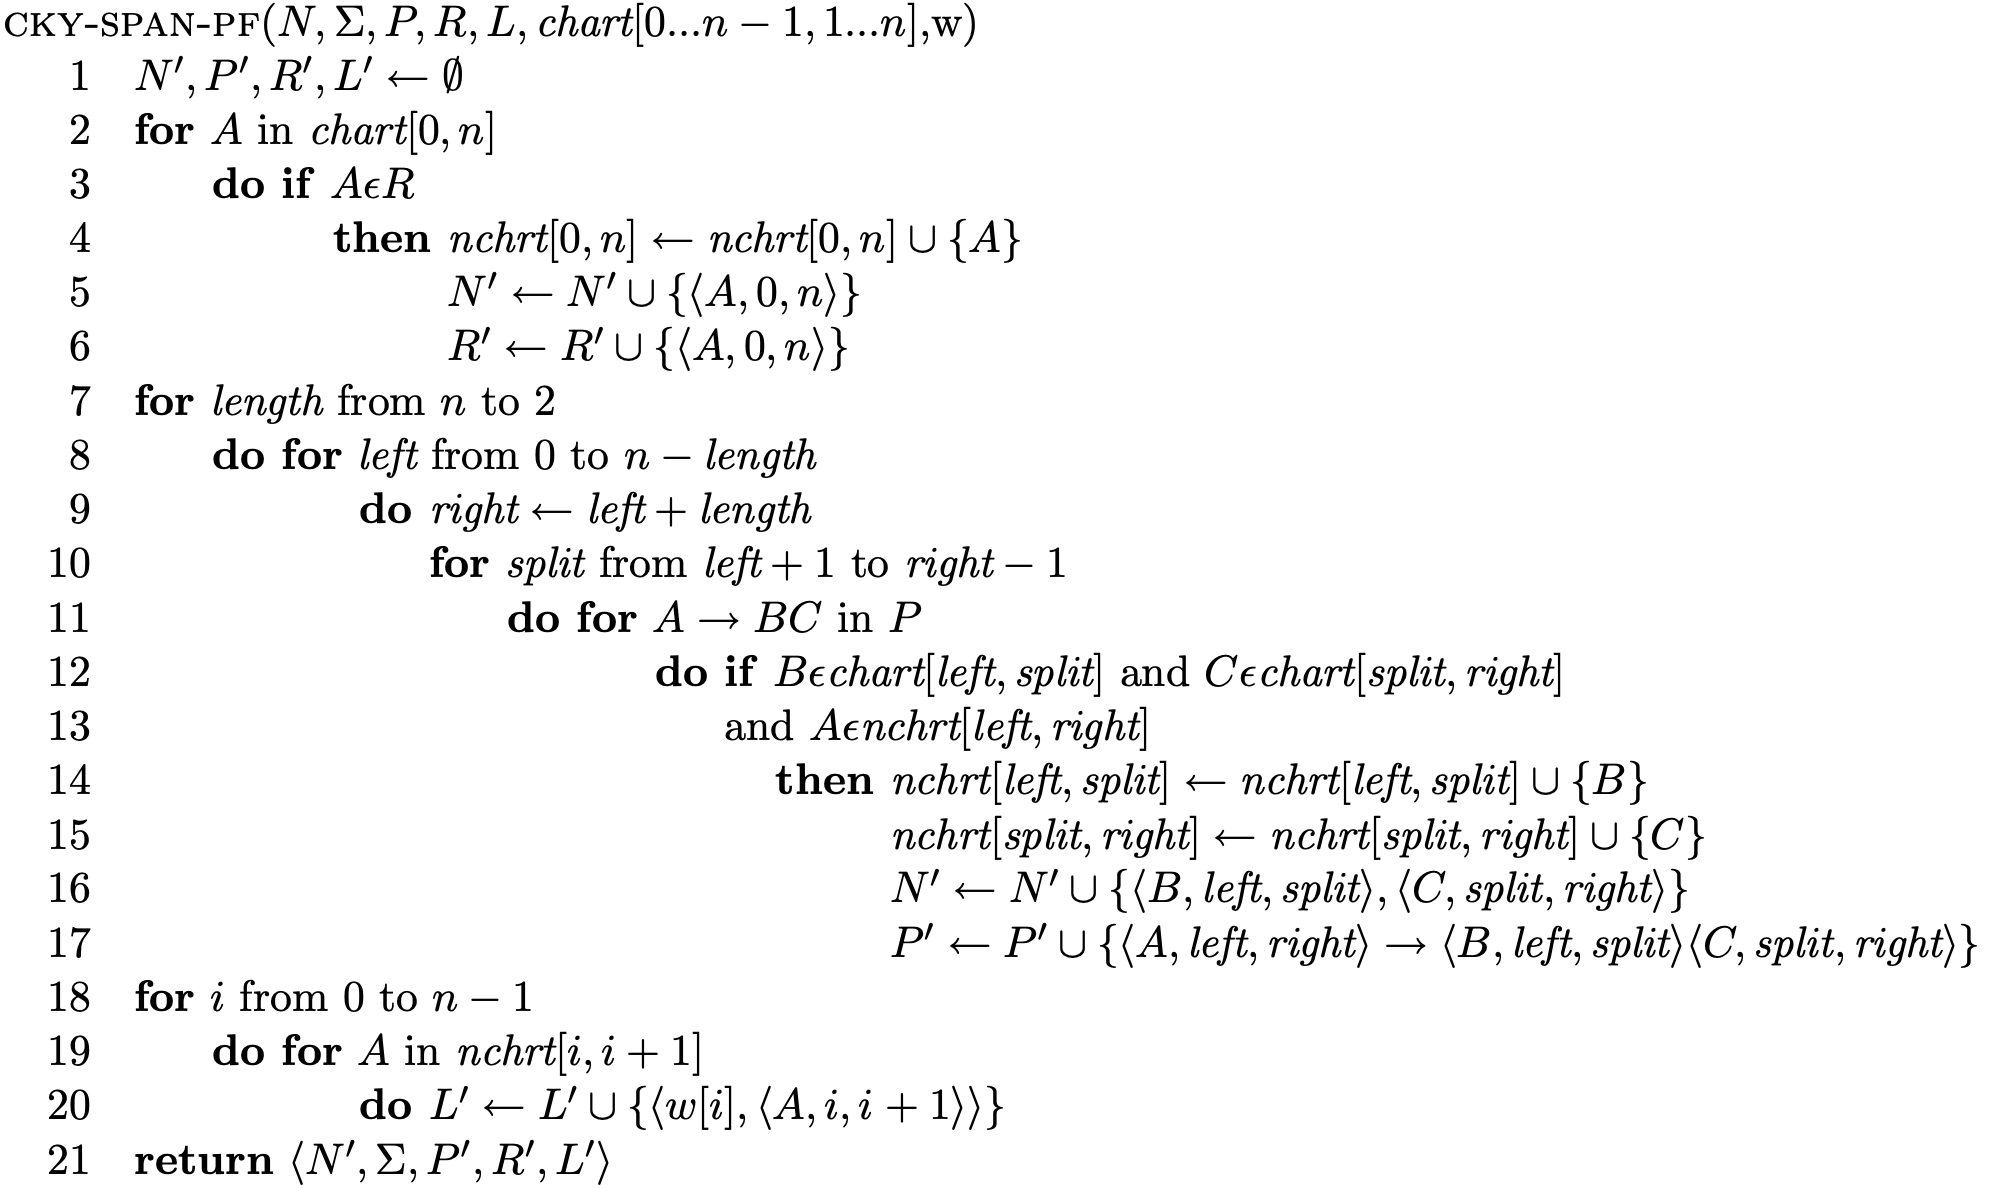

In [127]:
Image(filename='cky-span04.png') 

## Discussion
1. Number of steps in CKY
2. Number of symbols in CKY chart
3. Number of symbols and productions in range grammar
4. Number of steps needed for filtering and building range grammar

Count number of times line 8 in algorithm CKY is executed.

$|w|$ length of input string

$|P|$ number of productions

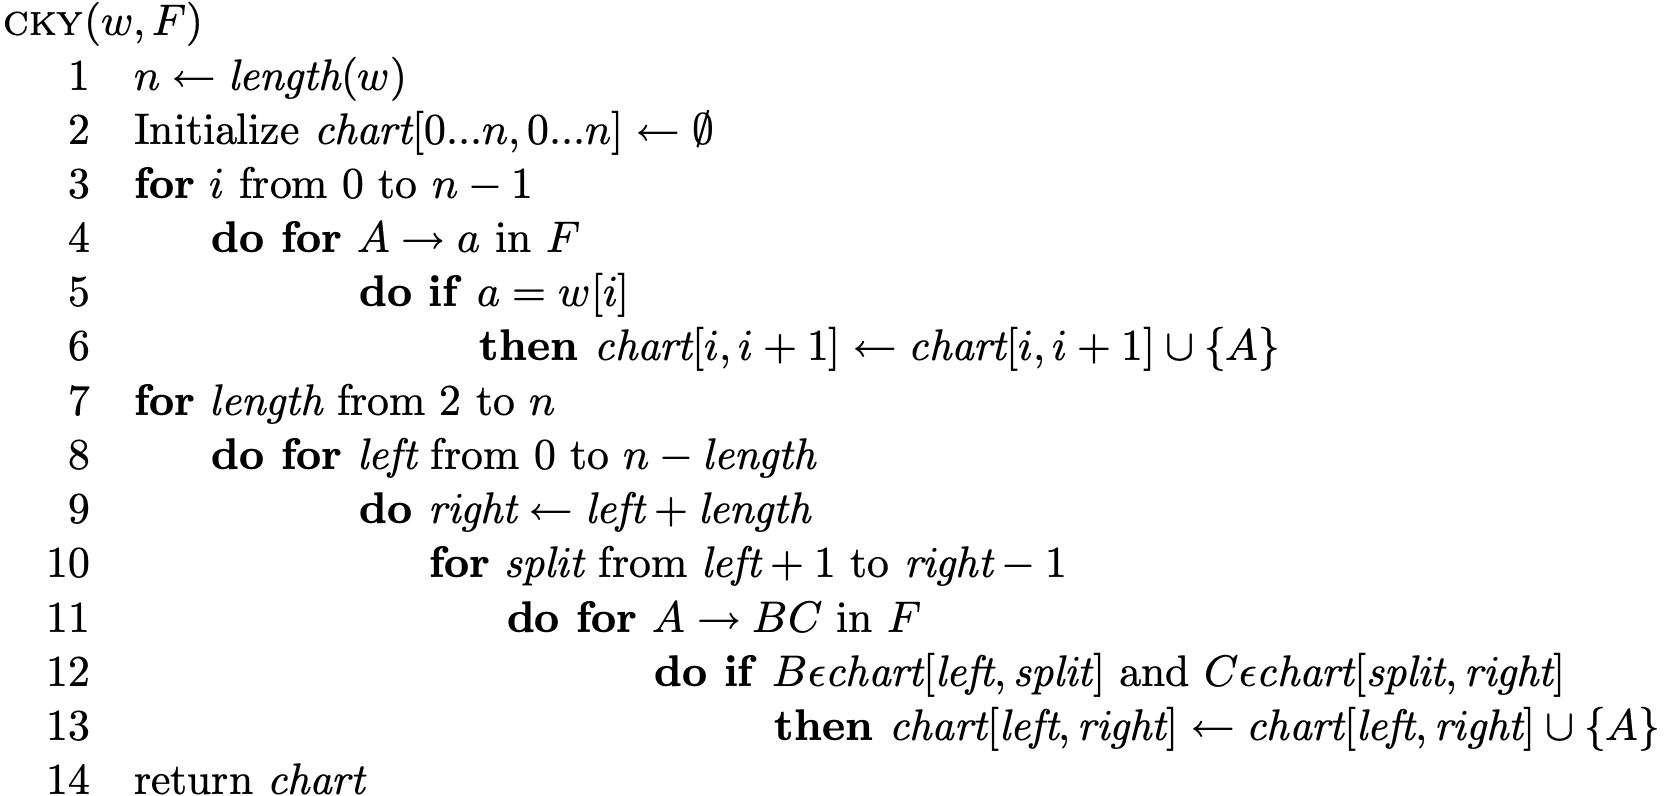

In [128]:
Image(filename='cky.png') 

### Symbol count
Number of symbols in CKY chart after parsing, or after parsing and filtering.

### Fast Context-Free Grammar Parsing Requires Fast Boolean Matrix Multiplication
 [Lee 2002](https://www.cs.cornell.edu/home/llee/papers/bmmcfl-jacm.pdf)
 
 Asymptotically faster parsing algorithms do exist. Graham, Harrison, and Ruzzo (1980) give a
variant of Earley’s algorithm that is based on the so-called “four Russians” algorithm (Arlazarov et
al., 1970) for Boolean matrix multiplication (BMM); it runs in time O(gn
3/ log n). Rytter (1985)
further modifies this parser by a compression technique, improving the dependence on the string
length to O(n
3/ log2 n). But Valiant’s (1975) parsing method, which reorganizes the computations
of CKY, is the asymptotically fastest known. It also uses BMM; its worst-case running time for a
grammar in Chomsky normal form is proportional to M(n), where M(m) is the time it takes to
multiply two m × m Boolean matrices together.